# ML: Clasificación

## 🟢 1. ¿Qué es el aprendizaje supervisado?

En Machine Learning, uno de los enfoques más usados es el **aprendizaje supervisado**. Este tipo de aprendizaje funciona a partir de ejemplos. Le damos a la computadora un conjunto de datos donde ya conocemos las respuestas correctas, para que aprenda a generalizar y pueda hacer predicciones en nuevos casos que nunca ha visto.

En nuestro caso, trabajaremos con un conjunto de datos sobre tumores. Cada fila representa un tumor distinto y contiene características como el tamaño, la textura y la forma de las células. Además, cada tumor está clasificado como **benigno (`0`)** o **maligno (`1`)**.

Al darle estos ejemplos al modelo, podrá aprender a distinguir patrones que lo ayuden a predecir si un nuevo tumor podría ser maligno o no, basándose únicamente en sus características.

---

### 📌 Conceptos clave

* **Observaciones (o muestras)**: cada fila del dataset; en nuestro caso, un tumor.
* **Características (features)**: columnas que describen cada observación, como `mean radius`, `mean texture`, etc.
* **Objetivo (target o etiqueta)**: lo que queremos predecir. Aquí, la clase del tumor: `0 = benigno`, `1 = maligno`.

> Este es un ejemplo de **clasificación binaria**, porque solo hay dos posibles clases de salida.


### 🤖 ¿Qué es un clasificador?

Un **clasificador** es un modelo que toma datos de entrada y predice a cuál clase pertenece cada observación.

En otras palabras, su trabajo es asignar una etiqueta (como `maligno` o `benigno`) en función de las características de entrada.

> Existen muchos tipos de clasificadores: árboles de decisión, regresión logística, máquinas de soporte vectorial, redes neuronales, etc. Cada uno tiene su propia forma de aprender y tomar decisiones.


### 📦 Cargando el dataset

Vamos a utilizar un dataset llamado `breast cancer`, disponible en `scikit-learn`. Este conjunto de datos contiene 30 características numéricas de tumores, más la clasificación (benigno o maligno).


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import joblib

In [15]:
sns.set_style('whitegrid')
sns.set_palette('pastel')

In [2]:
data = load_breast_cancer(as_frame=True)
df = data.frame
X = df.drop(columns=['target'])
y = df['target']

### ✂️ División del dataset en entrenamiento y validación

In [3]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

## 🔵 Árbol de decisión 🌲

Ahora que entendemos el problema, vamos a crear nuestro primer clasificador. Usaremos un **árbol de decisión**, un modelo muy intuitivo que funciona como una secuencia de preguntas:

> “¿El tamaño medio del núcleo es mayor a 15? Si sí, ve a la derecha; si no, ve a la izquierda.”

Este tipo de modelo se representa gráficamente como un árbol, donde cada nodo es una pregunta y cada rama representa una posible respuesta.


In [ ]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

Accuracy Árbol de Decisión: 0.951048951048951


### 😯 ¿Qué hace realmente `.fit()`?

Cuando usamos `.fit(X, y)`, estamos diciéndole al modelo que aprenda una relación entre las **características de entrada (`X`)** y el **objetivo (`y`)**. En este proceso, el modelo analiza los datos, encuentra patrones y genera una estructura interna (como un árbol de decisiones) que luego usará para hacer predicciones con `.predict()`.


### 🧠 Ejemplo simplificado

Supón que solo tuviéramos estas dos características:

* `mean radius`: tamaño promedio del núcleo
* `mean texture`: textura promedio

El árbol podría funcionar así:

1. ¿`mean radius` > 15?  
   * **Sí** → probablemente maligno.  
   * **No** → siguiente pregunta...

2. ¿`mean texture` > 20?  
   * **Sí** → probablemente maligno.  
   * **No** → probablemente benigno.

Cada una de estas decisiones es un **nodo** en el árbol, y al seguir las ramas, llegamos a una **hoja**, donde el modelo toma una decisión final (clase 0 o 1).


### 🌱 ¿Cómo elige las preguntas?

El modelo **aprende** las preguntas al analizar los datos de entrenamiento. Busca aquellas divisiones que mejor separen los casos benignos de los malignos.  
Este proceso se llama **división del árbol** (*splitting*), y se basa en criterios matemáticos como:

- **Gini impurity**
- **Entropía**

Estos criterios le indican qué tan “puros” son los grupos resultantes después de cada división. El modelo intenta que, en cada rama, las observaciones sean lo más homogéneas posible (todas malignas o todas benignas).


### 🔎 ¿Por qué es útil?

- ✅ Es **fácil de interpretar** (especialmente con pocas variables).
- ✅ Funciona bien con variables numéricas y categóricas.
- ✅ Es **rápido de entrenar** y de predecir.
- ✅ Se puede visualizar, lo cual ayuda a explicar las decisiones del modelo.


In [ ]:
preds_tree = tree_model.predict(X_valid)
print("Accuracy Árbol de Decisión:", accuracy_score(y_valid, preds_tree))

## 🌲🌲🌲 Random Forest 🌲🌲🌲

Ya entrenamos un modelo con un solo **árbol de decisión**, pero ¿qué pasaría si en lugar de uno, tuviéramos **muchos árboles** que votaran por la mejor respuesta?

Eso es exactamente lo que hace un **Random Forest**.

---

### 🌳 ¿Qué es un Random Forest?

Un **bosque aleatorio** es un modelo de clasificación que **entrena múltiples árboles de decisión** sobre diferentes partes del conjunto de datos.  
Cada árbol hace su propia predicción, y luego el bosque toma la **decisión final por votación** (la clase más frecuente).

---

### 🧠 ¿Por qué usar varios árboles?

Cada árbol, por sí solo, puede ser muy sensible a pequeños cambios en los datos (como un estudiante que se equivoca fácilmente si le cambias la pregunta).

Pero si juntamos las opiniones de muchos árboles distintos, el resultado es **más estable y preciso**.  
Es como preguntar a varios expertos y decidir según el consenso.

---

### ⚙️ ¿Cómo se entrena un Random Forest?

Cada árbol se entrena con una **muestra aleatoria** del dataset, y cada división del árbol se hace usando un **subconjunto aleatorio de características**. De ahí el nombre *“aleatorio”*.

Esto introduce **diversidad** entre los árboles y evita que todos cometan los mismos errores.

---

### 🛠️ Hiperparámetros clave

- `n_estimators`: número de árboles que tendrá el bosque.  
- `max_depth`: profundidad máxima de cada árbol (opcional).  
- `random_state`: semilla para reproducibilidad.

---

### 🌱 ¿Cuándo usar un Random Forest?

✅ Cuando quieres un modelo potente sin necesidad de mucho ajuste.  
✅ Cuando tu dataset tiene muchas características.  
✅ Cuando quieres evitar *overfitting*, ya que el bosque es más robusto.


In [5]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
preds_rf = rf_model.predict(X_valid)
print("Accuracy Random Forest:", accuracy_score(y_valid, preds_rf))

Accuracy Random Forest: 0.965034965034965


## 📈 Regresión Logística

## ⚫ 8. Regresión logística: un modelo lineal para clasificar 🧮

Al escuchar “regresión logística”, podrías pensar que sirve para predecir números (como la regresión lineal),  
pero no: este modelo se utiliza cuando queremos **clasificar observaciones en dos categorías**, como:

- ¿Es maligno o benigno?  
- ¿Fraude o no fraude?  
- ¿Cliente que se queda o que abandona?

---

### 🧠 ¿Cómo funciona?

La regresión logística es un **modelo lineal** que calcula una **probabilidad** de que una observación pertenezca a la clase positiva (por ejemplo, que un tumor sea maligno).

1. Toma una combinación lineal de las características (como un *score*):

   $$
   z = w_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n
   $$

2. Luego transforma ese número con una función llamada **sigmoide** (o logística), que convierte cualquier valor real en un número entre 0 y 1:

   $$
   \hat{p} = \frac{1}{1 + e^{-z}}
   $$

Este valor $\hat{p}$ es la **probabilidad** de que la observación pertenezca a la clase positiva (por ejemplo, `maligno = 1`).

---

### 📏 ¿Cómo decide la clase?

Usualmente se usa un umbral de 0.5:

- Si la probabilidad es mayor a 0.5 → clase 1  
- Si es menor o igual a 0.5 → clase 0

> Este umbral se puede ajustar si necesitas favorecer más *recall* o más *precision*.

---

### ⚙️ Ventajas de la regresión logística

- ✅ Fácil de interpretar (puedes ver el peso de cada variable).  
- ✅ Rápida de entrenar.  
- ✅ Buena performance en muchos problemas simples.  
- ✅ Menor riesgo de *overfitting* que modelos más complejos.

---

### 📌 ¿Cuándo usar regresión logística?

✅ Cuando necesitas un modelo interpretable (puedes ver el impacto de cada variable).  
✅ Cuando el problema es linealmente separable (las clases se pueden dividir con una línea o plano).  
✅ Cuando quieres una **línea base robusta** sobre la cual comparar modelos más complejos.


In [7]:
log_model = LogisticRegression(max_iter=20, random_state=42)
log_model.fit(X_train, y_train)
preds_log = log_model.predict(X_valid)
print("Accuracy Regresión Logística:", accuracy_score(y_valid, preds_log))

Accuracy Regresión Logística: 0.958041958041958


c:\Users\roman\Documents\proyectos\tripleten\bootcamp_ds_da\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 20 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=20).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 🟡 ¿Qué tan bueno es un modelo?

### 📝 ¿Qué significa que un modelo "funcione"?

Significa que cuando recibe nuevos datos (tumores que no ha visto antes), puede **predecir correctamente si son malignos o benignos**. Para saber si lo está haciendo bien, necesitamos compararlo con las respuestas verdaderas.

---

### ✅ *Accuracy* (Exactitud)

La métrica más simple para evaluar un modelo es la **exactitud**. Nos dice el **porcentaje de casos en los que el modelo acertó**.

> Si el modelo revisa 100 tumores y acierta en 90, la exactitud es 90%.

**Fórmula:**

$$
\text{Accuracy} = \frac{\text{Número de predicciones correctas}}{\text{Total de predicciones}}
$$

---

### ⚠️ ¡Pero cuidado con confiar demasiado en la accuracy!

Imagina este escenario:  
De cada 100 tumores, **95 son benignos** y solo **5 son malignos**.  
Si construyo un modelo muy simple que siempre diga “benigno”, acertará 95 de 100 veces.

$$
\text{Accuracy} = \frac{95}{100} = 0.95
$$

¡Y sin hacer ningún esfuerzo! Pero este modelo **nunca detectaría un tumor maligno**, lo cual es gravísimo.

---

### 🤯 El problema de los datos desbalanceados

Esto sucede cuando una de las clases aparece con mucha más frecuencia que la otra. En el caso del cáncer, esto es común: la mayoría de los casos suelen ser benignos, lo que puede **engañar** a las métricas simples como la *accuracy*.

Por eso, necesitamos usar otras métricas más especializadas que nos ayuden a entender **cómo** se equivoca el modelo, no solo cuánto.


En problemas médicos como la detección de cáncer, hay dos tipos de errores que debemos conocer bien:

---

### 🩹 1. Falso positivo (FP)

El modelo predice que el tumor es **maligno**, pero **no lo es**.  
Es como una falsa alarma: puede generar ansiedad, más pruebas y uso innecesario de recursos médicos.

---

### 🧪 2. Falso negativo (FN)

El modelo predice que el tumor es **benigno**, pero **sí era maligno**.  
Este es un error **mucho más grave**. El paciente no recibe tratamiento a tiempo y la enfermedad avanza sin que se detecte.

---

### 🎯 *Precision*

> “De todos los casos que el modelo predijo como malignos, ¿cuántos realmente lo eran?”

$$
\text{Precision} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Positivos}}
$$

Una alta *precision* significa que el modelo **no da muchas falsas alarmas**.  
Si predice "maligno", casi siempre tiene razón.

---

### 🔍 *Recall* (Sensibilidad)

> “De todos los tumores que realmente eran malignos, ¿cuántos detectó el modelo?”

$$
\text{Recall} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Negativos}}
$$

Una alta *recall* significa que el modelo **casi no deja pasar casos verdaderamente malignos sin detectarlos**.

---

### ⚖️ ¿Qué es el F1-score?

El **F1-score** es una métrica que combina la *precision* y el *recall* en un solo valor. Es especialmente útil cuando los datos están desbalanceados, ya que un modelo podría tener alta *accuracy* sin detectar correctamente la clase minoritaria.

El F1-score se define como la **media armónica** entre *precision* y *recall*:

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Esto significa que el F1-score solo será alto si **ambas métricas son altas**. Si una es muy baja, el F1-score también será bajo.

> Es una excelente medida cuando necesitas un balance entre no dar muchas falsas alarmas (*precision*) y no dejar pasar casos importantes (*recall*).

---

### 💡 ¿Qué es más importante?

Depende del contexto:

- En **publicidad**, tal vez te moleste un falso positivo, pero no es tan grave.
- En **medicina**, los falsos negativos son peligrosos. Por eso, **preferimos tener alto *recall***, incluso si cometemos algunos falsos positivos.


In [8]:
print("\nÁrbol de Decisión")
print(classification_report(y_valid, preds_tree))
print("\nRandom Forest")
print(classification_report(y_valid, preds_rf))
print("\nRegresión Logística")
print(classification_report(y_valid, preds_log))


Árbol de Decisión
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.97      0.96      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143


Random Forest
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143


Regresión Logística
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        54
           1       0.95      0.99      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       

## 📉 Visualización comparativa

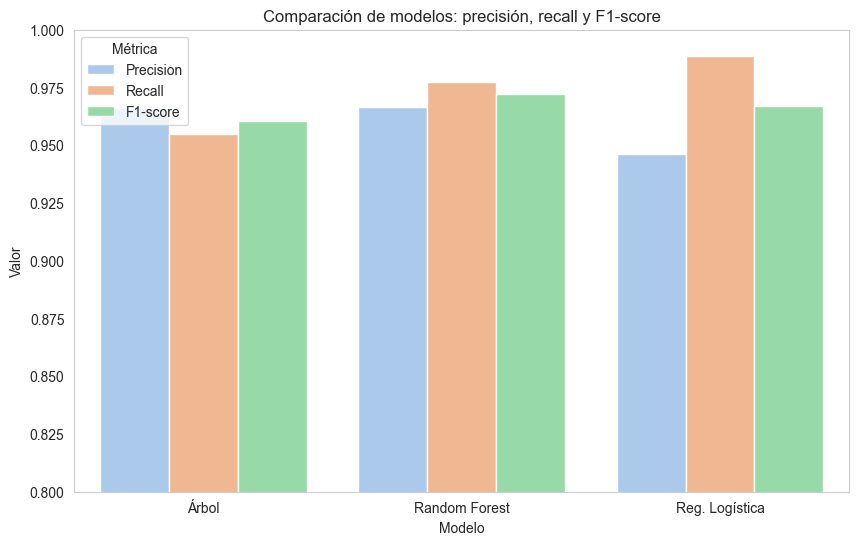

In [ ]:
# Datos
models = ['Árbol', 'Random Forest', 'Reg. Logística']
precisions = [
    precision_score(y_valid, preds_tree),
    precision_score(y_valid, preds_rf),
    precision_score(y_valid, preds_log),
]
recalls = [
    recall_score(y_valid, preds_tree),
    recall_score(y_valid, preds_rf),
    recall_score(y_valid, preds_log),
]
f1s = [
    f1_score(y_valid, preds_tree),
    f1_score(y_valid, preds_rf),
    f1_score(y_valid, preds_log),
]

# Crear dataframe en formato largo
df_metrics = pd.DataFrame({
    'Modelo': models * 3,
    'Métrica': ['Precision'] * 3 + ['Recall'] * 3 + ['F1-score'] * 3,
    'Valor': precisions + recalls + f1s
})

plt.figure(figsize=(10, 6))
sns.barplot(data=df_metrics, x='Modelo', y='Valor', hue='Métrica')
plt.ylim(0.8, 1.0)
plt.title("Comparación de modelos: precisión, recall y F1-score")
plt.grid(axis='y')
plt.legend(title='Métrica')
plt.show()

### 🧠 ¿Cuál modelo elegir?

* Si buscas **interpretabilidad**: regresión logística.
* Si quieres una **decisión simple y explicable**: árbol de decisión.
* Si quieres **mejor desempeño general**: Random Forest suele ganar.

> 🧘‍♂️ Pero recuerda: la elección ideal **depende del problema, los datos y el contexto**  
(por ejemplo, en salud, se prioriza *recall* sobre *accuracy*).


## 💾 10. Guardar y cargar tu modelo

Una vez que tienes un modelo que te gusta, **no necesitas volver a entrenarlo cada vez que lo vayas a usar**.  
Puedes guardarlo en un archivo y cargarlo más adelante, tal como lo harías con un documento o una imagen.

---

### 🧠 ¿Por qué guardar un modelo?

* Para evitar volver a entrenar (ahorra tiempo).
* Para usarlo en una aplicación real.
* Para compartirlo con otros (por ejemplo, en un equipo de trabajo).
* Para mantener versiones controladas de tus experimentos.

---

In [ ]:
# Guardamos el mejor modelo (ejemplo: Random Forest)
joblib.dump(rf_model, 'modelo_cancer.joblib')

In [ ]:
import joblib

# Cargar el modelo desde el archivo
modelo_cargado = joblib.load('modelo_cancer.joblib')

# Usarlo para predecir
nuevas_predicciones = modelo_cargado.predict(X_train)


## Cómo mejorar nuestros modelos

### 🧪 Ajuste de hiperparámetros con GridSearchCV

Una vez que identificamos al **Random Forest** como el mejor modelo en nuestras pruebas iniciales, podemos intentar **mejorar aún más su rendimiento** usando una técnica llamada `GridSearchCV`.

Esta técnica nos permite buscar automáticamente la **mejor combinación de hiperparámetros**, evaluando el desempeño del modelo con validación cruzada para cada combinación.

> Un hiperparámetro es una configuración externa al modelo que controla su comportamiento durante el entrenamiento. A diferencia de los parámetros (que el modelo aprende automáticamente con los datos), los hiperparámetros deben definirse antes de entrenar.

Por ejemplo, podemos probar distintas profundidades de árboles (`max_depth`) y cantidades de árboles (`n_estimators`):

> El resultado te indicará la combinación de hiperparámetros que ofreció el mejor equilibrio entre *precision* y *recall*, según el F1-score. Luego puedes usar ese modelo entrenado (`grid_search.best_estimator_`) para predecir sobre nuevos datos.


In [18]:

# Definir rejilla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10, None]
}

# Modelo base
rf = RandomForestClassifier(random_state=42)

# Búsqueda en rejilla con validación cruzada de 5 folds
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Mejor combinación encontrada
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor F1-score (cross-validated):", grid_search.best_score_)


Mejores parámetros: {'max_depth': 5, 'n_estimators': 50}
Mejor F1-score (cross-validated): 0.9684603312534895


### ¿Está aprendiendo bien o *demasiado bien*?

Hasta ahora, hemos entrenado modelos con todos los datos disponibles y evaluado qué tan bien predice sobre esos mismos datos.  
Pero en la vida real, los datos que veremos en el futuro **no serán exactamente iguales** a los que usamos para entrenar.  
Entonces surge una pregunta importante:

> **¿Nuestro modelo realmente aprendió a generalizar… o solo memorizó los ejemplos?**

Aquí entran dos conceptos fundamentales:

---

### 🤯 *Overfitting* (sobreajuste)

Un modelo sufre **overfitting** cuando aprende **demasiado bien** los datos de entrenamiento —al punto de que memoriza detalles y ruido específicos, en lugar de aprender patrones generales.

Es como un estudiante que memoriza todas las respuestas exactas de una guía... pero no entiende el tema.  
Si le cambias la pregunta en el examen, no sabe qué hacer.

> **Síntoma típico:** el modelo tiene un alto desempeño en el conjunto de entrenamiento pero bajo desempeño en datos nuevos.

---

### 😴 *Underfitting* (subajuste)

El **underfitting** ocurre cuando el modelo **no logra capturar los patrones esenciales** en los datos, ya sea porque es muy simple, porque no entrenó bien, o porque los datos no estaban bien preparados.

Es como un estudiante que no estudió lo suficiente: ni siquiera responde bien las preguntas de práctica.

> **Síntoma típico:** el modelo tiene un desempeño pobre tanto en entrenamiento como en validación.

---

### 🧪 ¿Cómo detectar estos problemas?

Para detectar *overfitting* y *underfitting*, necesitamos **dividir nuestros datos** en dos partes:

1. **Conjunto de entrenamiento** (`X_train`, `y_train`): para que el modelo aprenda.
2. **Conjunto de validación** (`X_valid`, `y_valid`): para evaluar qué tan bien generaliza.

Así comparamos el desempeño en **datos vistos** vs **no vistos**.

---

### 📊 ¿Cómo interpretarlo?

- Si el *accuracy* es **muy alto en entrenamiento y bajo en validación** → *overfitting*.
- Si el *accuracy* es **bajo en ambos conjuntos** → *underfitting*.
- Si el *accuracy* es **similar y alto en ambos** → el modelo está generalizando bien. ✅

> *Tu meta no es tener 100% de aciertos en entrenamiento, sino un modelo que funcione bien con nuevos datos reales.*
